In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading the data

In [2]:
#renaming teams so the names from football-data and fbref match
team_mapping = {
    'Köln': 'FC Koln',
    'Hamburger SV': 'Hamburg',
    'Hannover 96': 'Hannover',
    'Hertha BSC': 'Hertha',
    "M'Gladbach": "M'gladbach",
    'Mainz 05':'Mainz',
    "Nürnberg": "Nurnberg",
    'Eint Frankfurt': 'Ein Frankfurt',
    'St. Pauli': 'St Pauli',
    'Düsseldorf' : 'Fortuna Dusseldorf',
    'Greuther Fürth' :'Greuther Furth',
    'Paderborn 07' : 'Paderborn',
    'Darmstadt 98' : 'Darmstadt',
    'Ingolstadt 04': 'Ingolstadt',
    'Arminia':'Bielefeld',
} 




In [3]:
#saving each season downloaded from football-data as a data frame
df1_fbd = pd.read_csv("b0910.csv")
df2_fbd = pd.read_csv("b1011.csv")
df3_fbd = pd.read_csv("b1112.csv")
df4_fbd = pd.read_csv("b1213.csv")
df5_fbd = pd.read_csv("b1314.csv")
df6_fbd = pd.read_csv("b1415.csv")
df7_fbd = pd.read_csv("b1516.csv")
df8_fbd = pd.read_csv("b1617.csv")
df9_fbd = pd.read_csv("b1718.csv")
df10_fbd = pd.read_csv("b1819.csv")
df11_fbd = pd.read_csv("b1920.csv")
df12_fbd = pd.read_csv("b2021.csv")



#2009/10 Season
df1_fbd = df1_fbd.iloc[:, :22] #removing betting data
df1_fbref = pd.read_html('https://fbref.com/en/comps/20/2009-2010/2009-2010-Bundesliga-Stats')[0]
df1_fbref = df1_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df1_fbref['Squad'] = df1_fbref['Squad'].replace(team_mapping) 
df1 = df1_fbd.merge(df1_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df1 = df1.drop('Squad', axis=1)


#2010/11 Season
df2_fbd = df2_fbd.iloc[:, :22] #removing betting data
df2_fbref = pd.read_html('https://fbref.com/en/comps/20/2010-2011/2010-2011-Bundesliga-Stats')[0]
df2_fbref = df2_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df2_fbref['Squad'] = df2_fbref['Squad'].replace(team_mapping) 
df2 = df2_fbd.merge(df2_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
#left_on use 'HomeTeam' column in df_1 as the key    
#right_on use 'Squad' column as the key in df1
#how = 'left' perform a left jont -
df2= df2.drop('Squad', axis =1) #remvong squad column


#2011/12 Season
df3_fbd = df3_fbd.iloc[:, :22] #removing betting data
df3_fbref = pd.read_html('https://fbref.com/en/comps/20/2011-2012/2011-2012-Bundesliga-Stats')[0]
df3_fbref = df3_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df3_fbref['Squad'] = df3_fbref['Squad'].replace(team_mapping) #renaming
df3 = df3_fbd.merge(df3_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df3 = df3.drop('Squad', axis =1) #remvong squad column


#2012/13 Season
df4_fbd = df4_fbd.iloc[:, :22] #removing betting data
df4_fbref = pd.read_html('https://fbref.com/en/comps/20/2012-2013/2012-2013-Bundesliga-Stats')[0]
df4_fbref = df4_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df4_fbref['Squad'] = df4_fbref['Squad'].replace(team_mapping) #renaming
df4 = df4_fbd.merge(df4_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df4 =df4.drop('Squad', axis =1) #remvong squad column

#2013/14 Season
df5_fbd = df5_fbd.iloc[:, :22] #removing betting data
df5_fbref = pd.read_html('https://fbref.com/en/comps/20/2013-2014/2013-2014-Bundesliga-Stats')[0]
df5_fbref = df5_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df5_fbref['Squad'] = df5_fbref['Squad'].replace(team_mapping) #renaming
df5 = df5_fbd.merge(df5_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
df5 = df5.drop('Squad', axis =1) #remvong squad column


#2014/15
df6_fbd = df6_fbd.iloc[:, :22]
df6_fbref=pd.read_html('https://fbref.com/en/comps/20/2014-2015/schedule/2014-2015-Bundesliga-Scores-and-Fixtures')[0]
df6_fbref = df6_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7,8]] 
df6_fbref['Home'] = df6_fbref['Home'].replace(team_mapping)
df6_fbref['Away'] = df6_fbref['Away'].replace(team_mapping)
df6 = df6_fbd.merge(df6_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df6_fbd['Attendance'] = df6['Attendance']
df6 = df6.drop(['Home', 'Away'], axis =1)

#2015/16
df7_fbd = df7_fbd.iloc[:, :22]
df7_fbref=pd.read_html('https://fbref.com/en/comps/20/2015-2016/schedule/2015-2016-Bundesliga-Scores-and-Fixtures')[0]
df7_fbref = df7_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7,8]] 
df7_fbref['Home'] = df7_fbref['Home'].replace(team_mapping)
df7_fbref['Away'] = df7_fbref['Away'].replace(team_mapping)
df7 = df7_fbd.merge(df7_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df7_fbd['Attendance'] = df7['Attendance']
df7 = df7.drop(['Home', 'Away'], axis =1)

#2016/17
df8_fbd = df8_fbd.iloc[:, :22]
df8_fbref=pd.read_html('https://fbref.com/en/comps/20/2016-2017/schedule/2016-2017-Bundesliga-Scores-and-Fixtures')[0]
df8_fbref = df8_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 7,8]] 
df8_fbref['Home'] = df8_fbref['Home'].replace(team_mapping)
df8_fbref['Away'] = df8_fbref['Away'].replace(team_mapping)
df8 = df8_fbd.merge(df8_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df8_fbd['Attendance'] = df8['Attendance']
df8 = df8.drop(['Home', 'Away'], axis =1)

#2017/18
df9_fbd = df9_fbd.iloc[:, :22]
df9_fbref=pd.read_html('https://fbref.com/en/comps/20/2017-2018/schedule/2017-2018-Bundesliga-Scores-and-Fixtures')[0]
df9_fbref = df9_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df9_fbref['Home'] = df9_fbref['Home'].replace(team_mapping)
df9_fbref['Away'] = df9_fbref['Away'].replace(team_mapping)
df9 = df9_fbd.merge(df9_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df9_fbd['Attendance'] = df9['Attendance']
df9 = df9.drop(['Home', 'Away'], axis =1)

#2018/19
df10_fbd = df10_fbd.iloc[:, :22]
df10_fbref=pd.read_html('https://fbref.com/en/comps/20/2018-2019/schedule/2018-2019-Bundesliga-Scores-and-Fixtures')[0]
df10_fbref = df10_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df10_fbref['Home'] = df10_fbref['Home'].replace(team_mapping)
df10_fbref['Away'] = df10_fbref['Away'].replace(team_mapping)
df10 = df10_fbd.merge(df10_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df10_fbd['Attendance'] = df10['Attendance']
df10 = df10.drop(['Home', 'Away'], axis =1)

#2019/20
df11_fbd = df11_fbd.iloc[:, :23]
df11_fbref=pd.read_html('https://fbref.com/en/comps/20/2019-2020/schedule/2019-2020-Bundesliga-Scores-and-Fixtures')[0]
df11_fbref = df11_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df11_fbref['Home'] = df11_fbref['Home'].replace(team_mapping)
df11_fbref['Away'] = df11_fbref['Away'].replace(team_mapping)
df11 = df11_fbd.merge(df11_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df11_fbd['Attendance'] = df11['Attendance']
df11 = df11.drop(['Home', 'Away'], axis =1)

#2020/21
df12_fbd = df12_fbd.iloc[:, :23]
df12_fbref=pd.read_html('https://fbref.com/en/comps/20/2020-2021/schedule/2020-2021-Bundesliga-Scores-and-Fixtures')[0]
df12_fbref = df12_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [5, 9,10]] 
df12_fbref['Home'] = df12_fbref['Home'].replace(team_mapping)
df12_fbref['Away'] = df12_fbref['Away'].replace(team_mapping)
df12 = df12_fbd.merge(df12_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df12_fbd['Attendance'] = df12['Attendance']
df12 = df12.drop(['Home', 'Away'], axis =1)

bundesliga = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0).reset_index(drop=True)

# Save the combined DataFrame to a new CSV file
bundesliga.to_csv('bundesliga.csv', index=False)

# Adding Season 

In [4]:
#creating Season column 
start_year = 2009
bundesliga['Season'] = [f"{start_year + i // 306}/{start_year + i // 306 + 1}" for i in range(len(bundesliga))]

#moving season column to be the second column
bundesliga.insert(1, 'Season', bundesliga.pop('Season'))





# Data Cleaning

In [5]:
bundesliga.head(10)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
0,D1,2009/2010,07/08/09,Wolfsburg,Stuttgart,2,0,H,0,0,...,12,12,6,3,0,0,0,0,29232.0,NaN
1,D1,2009/2010,08/08/09,Dortmund,FC Koln,1,0,H,0,0,...,8,10,16,1,0,1,0,0,77268.0,NaN
2,D1,2009/2010,08/08/09,Hertha,Hannover,1,0,H,0,0,...,16,20,5,3,3,2,0,0,46681.0,NaN
3,D1,2009/2010,08/08/09,Hoffenheim,Bayern Munich,1,1,D,1,1,...,10,28,3,10,0,2,0,0,29690.0,NaN
4,D1,2009/2010,08/08/09,Mainz,Leverkusen,2,2,D,1,2,...,22,28,3,5,1,2,0,0,20138.0,NaN
5,D1,2009/2010,08/08/09,Nurnberg,Schalke 04,1,2,A,0,1,...,14,21,9,6,2,1,0,0,42336.0,NaN
6,D1,2009/2010,08/08/09,Werder Bremen,Ein Frankfurt,2,3,A,2,2,...,18,20,9,3,1,2,1,0,35990.0,NaN
7,D1,2009/2010,09/08/09,Bochum,M'gladbach,3,3,D,0,3,...,13,21,11,5,3,1,0,1,24842.0,NaN
8,D1,2009/2010,09/08/09,Freiburg,Hamburg,1,1,D,0,1,...,22,19,12,6,2,1,0,0,22959.0,NaN
9,D1,2009/2010,15/08/09,Bayern Munich,Werder Bremen,1,1,D,0,1,...,13,9,5,2,1,0,0,0,69000.0,NaN


In [7]:
#shape of data frame
bundesliga.shape

(3672, 25)

In [8]:
#checking missing values
bundesliga.isnull().sum()

Div              0
Season           0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
Attendance     353
Time          3060
dtype: int64

In [9]:
#removing the time axis
bundesliga = bundesliga.drop('Time', axis=1)

In [10]:
#checking if any of the attendance missing values were pre covid
bundesliga_pre_covid = bundesliga.iloc[0:3282]
bundesliga_pre_covid['Attendance'].isnull().sum()

0

In [11]:
#replaceing all NaN attendance points with zero
bundesliga['Attendance'].fillna(0, inplace=True) 

In [12]:
#rechecking to now see if there are any missing data points
bundesliga.isnull().sum()

Div           0
Season        0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
Attendance    0
dtype: int64

In [13]:
#Data types
bundesliga.dtypes

Div            object
Season         object
Date           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
FTR            object
HTHG            int64
HTAG            int64
HTR            object
HS              int64
AS              int64
HST             int64
AST             int64
HF              int64
AF              int64
HC              int64
AC              int64
HY              int64
AY              int64
HR              int64
AR              int64
Attendance    float64
dtype: object

In [14]:
#identifying duplicated rows
bundesliga.duplicated().sum()

0

In [15]:
#Describe the data
bundesliga.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,3672.0,1.641612,1.359848,0.0,1.00,1.0,2.0,9.0
FTAG,3672.0,1.306100,1.220673,0.0,0.00,1.0,2.0,8.0
HTHG,3672.0,0.722767,0.853435,0.0,0.00,1.0,1.0,6.0
HTAG,3672.0,0.564542,0.740453,0.0,0.00,0.0,1.0,5.0
HS,3672.0,14.116830,5.139696,1.0,10.00,14.0,17.0,36.0
AS,3672.0,11.655501,4.670955,0.0,8.00,11.0,15.0,33.0
HST,3672.0,5.129902,2.643796,0.0,3.00,5.0,7.0,16.0
AST,3672.0,4.264706,2.414132,0.0,2.00,4.0,6.0,14.0
HF,3672.0,14.017157,4.506478,2.0,11.00,14.0,17.0,32.0
AF,3672.0,14.867919,4.740930,1.0,11.75,15.0,18.0,32.0


In [16]:
bundesliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         3672 non-null   object 
 1   Season      3672 non-null   object 
 2   Date        3672 non-null   object 
 3   HomeTeam    3672 non-null   object 
 4   AwayTeam    3672 non-null   object 
 5   FTHG        3672 non-null   int64  
 6   FTAG        3672 non-null   int64  
 7   FTR         3672 non-null   object 
 8   HTHG        3672 non-null   int64  
 9   HTAG        3672 non-null   int64  
 10  HTR         3672 non-null   object 
 11  HS          3672 non-null   int64  
 12  AS          3672 non-null   int64  
 13  HST         3672 non-null   int64  
 14  AST         3672 non-null   int64  
 15  HF          3672 non-null   int64  
 16  AF          3672 non-null   int64  
 17  HC          3672 non-null   int64  
 18  AC          3672 non-null   int64  
 19  HY          3672 non-null  

# Adding New Variables

In [17]:
# Home team average goals scored at home full time
bundesliga['HAGSFT'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['FTHG']  # Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Away team average goals scored away full time 
bundesliga['AAGSFT'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['FTAG'] #Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average goals scored at home half time
bundesliga['HAGSHT'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HTHG'] #Grouping by season and home team, selecting HTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average goals scored away half time 
bundesliga['AAGSHT'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['HTAG'] #Grouping by season and home team, selecting HTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



# Home team average goals conceded at home fill time
bundesliga['HAGCFT'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['FTAG']  # Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

# Away team average goals conceded away full time 
bundesliga['AAGCFT'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['FTHG']  # Grouping by season and away team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average red cards at home 
bundesliga['HAR'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HR'] #Grouping by season and home team, selecting HR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average red cards away 
bundesliga['AAR'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AR'] #Grouping by season and home team, selecting AR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average yellow cards at home 
bundesliga['HAY'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HY'] #Grouping by season and home team, selecting HY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average yellow cards away 
bundesliga['AAY'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AY'] #Grouping by season and home team, selecting AY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average fouls at home 
bundesliga['HAF'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HF'] #Grouping by season and home team, selecting HF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average fouls away 
bundesliga['AAF'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AF'] #Grouping by season and home team, selecting AF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average corners at home 
bundesliga['HAC'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HC'] #Grouping by season and home team, selecting HC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average corners away 
bundesliga['AAC'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AC'] #Grouping by season and home team, selecting AC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots at home 
bundesliga['HAS'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HS'] #Grouping by season and home team, selecting HS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots away 
bundesliga['AAS'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AS'] #Grouping by season and home team, selecting AS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots on target at home 
bundesliga['HAST'] = (
    bundesliga.groupby(['Season', 'HomeTeam'])['HST'] #Grouping by season and home team, selecting HST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots on target away 
bundesliga['AAST'] = (
    bundesliga.groupby(['Season', 'AwayTeam'])['AST'] #Grouping by season and home team, selecting AST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)







#Home team percentage of games won, lost and drawn at home
# Create new columns to store cumulative statistics for each HomeTeam's away games
bundesliga['home_games'] = 0
bundesliga['home_won'] = 0
bundesliga['home_lost'] = 0
bundesliga['home_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each HomeTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in bundesliga.iterrows():
    home_team = row['HomeTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (home_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

    # Update cumulative statistics based on the 'FTR' result
    cumulative_stats_by_season[(home_team, season)]['home_games'] += 1
    cumulative_stats_by_season[(home_team, season)]['home_won'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(home_team, season)]['home_lost'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(home_team, season)]['home_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns 
    bundesliga.at[index, 'home_games'] = cumulative_stats_by_season[(home_team, season)]['home_games']
    bundesliga.at[index, 'home_won'] = cumulative_stats_by_season[(home_team, season)]['home_won']
    bundesliga.at[index, 'home_lost'] = cumulative_stats_by_season[(home_team, season)]['home_lost']
    bundesliga.at[index, 'home_drawn'] = cumulative_stats_by_season[(home_team, season)]['home_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != bundesliga.at[index - 1, 'Season']:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

#For each team shift the statsitcs down a row 
bundesliga['home_won'] = bundesliga.groupby('HomeTeam')['home_won'].transform(lambda x: x.shift(1))
bundesliga['home_drawn'] = bundesliga.groupby('HomeTeam')['home_drawn'].transform(lambda x: x.shift(1))
bundesliga['home_lost'] = bundesliga.groupby('HomeTeam')['home_lost'].transform(lambda x: x.shift(1))
bundesliga['home_games'] = bundesliga.groupby('HomeTeam')['home_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
bundesliga['home_won'].fillna(0, inplace=True)
bundesliga['home_drawn'].fillna(0, inplace=True)
bundesliga['home_lost'].fillna(0, inplace=True)
bundesliga['home_games'].fillna(0, inplace=True)


#calculate the means for each row
bundesliga['HAWH'] = bundesliga['home_won'] / bundesliga['home_games']
bundesliga['HALH'] = bundesliga['home_lost'] / bundesliga['home_games']
bundesliga['HADH'] = bundesliga['home_drawn'] / bundesliga['home_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = bundesliga.groupby(['Season', 'HomeTeam']).cumcount() == 0
# Set the values to zero
bundesliga.loc[first_row_mask, ['HAWH', 'HALH', 'HADH']] = 0

#Remove the rows from the data frame 
bundesliga =bundesliga.drop(columns=['home_won','home_lost','home_drawn','home_games'],axis=1)







#Away team decimal of games won lost and drawn at home per season
# Create new columns to store cumulative statistics for each AwayTeam's away games
bundesliga['away_games'] = 0
bundesliga['away_won'] = 0
bundesliga['away_lost'] = 0
bundesliga['away_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each AwayTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in bundesliga.iterrows():
    away_team = row['AwayTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (away_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(away_team, season)]['away_games'] += 1
    cumulative_stats_by_season[(away_team, season)]['away_won'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(away_team, season)]['away_lost'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(away_team, season)]['away_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns 
    bundesliga.at[index, 'away_games'] = cumulative_stats_by_season[(away_team, season)]['away_games']
    bundesliga.at[index, 'away_won'] = cumulative_stats_by_season[(away_team, season)]['away_won']
    bundesliga.at[index, 'away_lost'] = cumulative_stats_by_season[(away_team, season)]['away_lost']
    bundesliga.at[index, 'away_drawn'] = cumulative_stats_by_season[(away_team, season)]['away_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != bundesliga.at[index - 1, 'Season']:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

#For each team shift the statsitcs down a row 
bundesliga['away_won'] = bundesliga.groupby('AwayTeam')['away_won'].transform(lambda x: x.shift(1))
bundesliga['away_drawn'] = bundesliga.groupby('AwayTeam')['away_drawn'].transform(lambda x: x.shift(1))
bundesliga['away_lost'] = bundesliga.groupby('AwayTeam')['away_lost'].transform(lambda x: x.shift(1))
bundesliga['away_games'] = bundesliga.groupby('AwayTeam')['away_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
bundesliga['away_won'].fillna(0, inplace=True)
bundesliga['away_drawn'].fillna(0, inplace=True)
bundesliga['away_lost'].fillna(0, inplace=True)
bundesliga['away_games'].fillna(0, inplace=True)

#calculate the means for each row
bundesliga['AAWA'] = bundesliga['away_won'] / bundesliga['away_games']
bundesliga['AALA'] = bundesliga['away_lost'] / bundesliga['away_games']
bundesliga['AADA'] = bundesliga['away_drawn'] / bundesliga['away_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = bundesliga.groupby(['Season', 'AwayTeam']).cumcount() == 0
# Set the values to zero
bundesliga.loc[first_row_mask, ['AAWA', 'AALA', 'AADA']] = 0

#Remove the rows from the data frame 
bundesliga =bundesliga.drop(columns=['away_won','away_lost','away_drawn','away_games'],axis=1)

In [18]:
#Adding a new column for if the match was pre or during covid
# Set 'pre_covid' to True for rows up to index 3282, and False for rows after that index
bundesliga['Pre_covid'] = bundesliga.index <= 3282

#Creating pre and during covid data frame
bundesliga_pre_covid = bundesliga[bundesliga['Pre_covid'] == True]
bundesliga_during_covid = bundesliga[bundesliga['Pre_covid'] == False]

In [19]:
#Adding home and away points 
bundesliga['HomeTeamPoints'] = 0
bundesliga['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
bundesliga = bundesliga.apply(update_points, axis=1)

# Create running tally of points for each team for each season
bundesliga['HomeTeamPoints'] = bundesliga.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
bundesliga['AwayTeamPoints'] = bundesliga.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Create a data frame to store total points for each team within each season
total_points_home = bundesliga.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away = bundesliga.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

# Merge the data frames to combine home and away points
total_points = pd.merge(total_points_home, total_points_away, how='outer', left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'], suffixes=('_Home', '_Away'))

# Calculate total points for each team by combining home and away points
total_points['TotalPoints'] = total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']

# Calculate HA as the ratio of home points to the sum of home points and away points
total_points['SeasonalHA'] = round(total_points['HomeTeamPoints'] / (total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']), 4)

# Calculate OverallHA for each team by summing overall home points and away points, then applying the formula H / (H + A) 
overall_ha = total_points.groupby('HomeTeam', as_index=False).agg({'HomeTeamPoints': 'sum', 'AwayTeamPoints': 'sum'})
overall_ha['OverallHA'] = round(overall_ha['HomeTeamPoints'] / (overall_ha['HomeTeamPoints'] + overall_ha['AwayTeamPoints']), 4)


# Merge SeasonalHA and OverallHA into the total_points data frame
total_points = pd.merge(total_points, overall_ha[['HomeTeam', 'OverallHA']], how='left', left_on='HomeTeam', right_on='HomeTeam')

# Sort the data frame by Season and TotalPoints columns
total_points = total_points.sort_values(by=['Season', 'TotalPoints'], ascending=[True, False])

total_points = total_points[['Season', 'HomeTeam', 'HomeTeamPoints', 'AwayTeamPoints', 'TotalPoints', 'SeasonalHA', 'OverallHA']]



In [22]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
bundesliga_pre_covid.loc[:, 'HomeTeamPoints'] = 0
bundesliga_pre_covid.loc[:, 'AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
bundesliga_pre_covid = bundesliga_pre_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
bundesliga_pre_covid['HomeTeamPoints'] = bundesliga_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
bundesliga_pre_covid['AwayTeamPoints'] = bundesliga_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()



# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
bundesliga_during_covid.loc[:, 'HomeTeamPoints'] = 0
bundesliga_during_covid.loc[:, 'AwayTeamPoints'] = 0


# Apply the update_points function to each row
bundesliga_during_covid = bundesliga_during_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
bundesliga_during_covid['HomeTeamPoints'] = bundesliga_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
bundesliga_during_covid['AwayTeamPoints'] = bundesliga_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()





# Calculate total points for each team within each season

# Create a data frame to store total points for each team within each season
total_points_home_pre = bundesliga_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_pre = bundesliga_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()
total_points_home_during = bundesliga_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_during = bundesliga_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()


#Aggregate the total points foe each team across the seasons 
total_points_home_pre = total_points_home_pre.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_pre = total_points_away_pre.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()
total_points_home_during = total_points_home_during.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_during = total_points_away_during.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()


#Rename columns for clarity 
total_points_home_pre= total_points_home_pre.rename(columns={'HomeTeamPoints':'HomePointsPreCovid', 'HomeTeam':'Team'})
total_points_away_pre= total_points_away_pre.rename(columns={'AwayTeamPoints':'AwayPointsPreCovid','AwayTeam':'Team'})
total_points_home_during= total_points_home_during.rename(columns={'HomeTeamPoints':'HomePointsDuringCovid', 'HomeTeam':'Team'})
total_points_away_during= total_points_away_during.rename(columns={'AwayTeamPoints':'AwayPointsDuringCovid','AwayTeam':'Team'})

#merge the total points for home and away team and for pre covid and covid
points = pd.merge(total_points_home_pre, total_points_away_pre, on='Team', how='outer')
points = pd.merge(points, total_points_home_during, on='Team', how='outer')
points = pd.merge(points, total_points_away_during, on='Team', how='outer')



#Combine home and away points to get the total points for each team
points['TotalPointsPreCovid'] = points['HomePointsPreCovid'] + points['AwayPointsPreCovid']
points['TotalPointsDuringCovid'] = points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 d.p.
points['HAPreCovid'] = round(points['HomePointsPreCovid'] / (points['TotalPointsPreCovid']), 4)
points['HADuringCovid'] = round(points['HomePointsDuringCovid'] / (points['TotalPointsDuringCovid']), 4)

#Create a new data frame with only relevant columns and fill all NaN with 0
ha_pre_during_covid = points.drop(columns=['HomePointsPreCovid','HomePointsDuringCovid','AwayPointsPreCovid','AwayPointsDuringCovid','TotalPointsPreCovid','TotalPointsDuringCovid'],axis=1)
ha_pre_during_covid = ha_pre_during_covid.fillna(0)

ha_pre_during_covid

,Team,HAPreCovid,HADuringCovid
0,Augsburg,0.5776,0.5333
1,Bayern Munich,0.5392,0.5238
2,Bochum,0.4286,0.0000
3,Braunschweig,0.7200,0.0000
4,Darmstadt,0.5238,0.0000
5,Dortmund,0.5681,0.5000
6,Ein Frankfurt,0.6134,0.5714
7,FC Koln,0.5906,0.4595
8,Fortuna Dusseldorf,0.6250,0.7500
9,Freiburg,0.6162,0.6316


In [23]:
#Joining all tables 

# Merge the data frames based on Season and HomeTeam
merged_df = pd.merge(bundesliga, total_points, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'HomeTeam'])

# Selecting and adding the columns
columns_to_add = ['OverallHA', 'SeasonalHA']
bundesliga[columns_to_add] = merged_df[columns_to_add]

# Merge the result data frame based on team and HomeTeam
merged_df = pd.merge(bundesliga, ha_pre_during_covid, how='left', left_on='HomeTeam', right_on='Team')

#selecting and adding the columns add to the main data frame
columns_to_add = ['HAPreCovid', 'HADuringCovid']
bundesliga[columns_to_add] = merged_df[columns_to_add]

#Renaming the columns 
bundesliga = bundesliga.rename(columns={'Pre_covid':'PreCovid'})

In [24]:
#Save the data frame with new columns to csv
bundesliga.to_csv('bundesliga.csv', index=False)

# Graphs

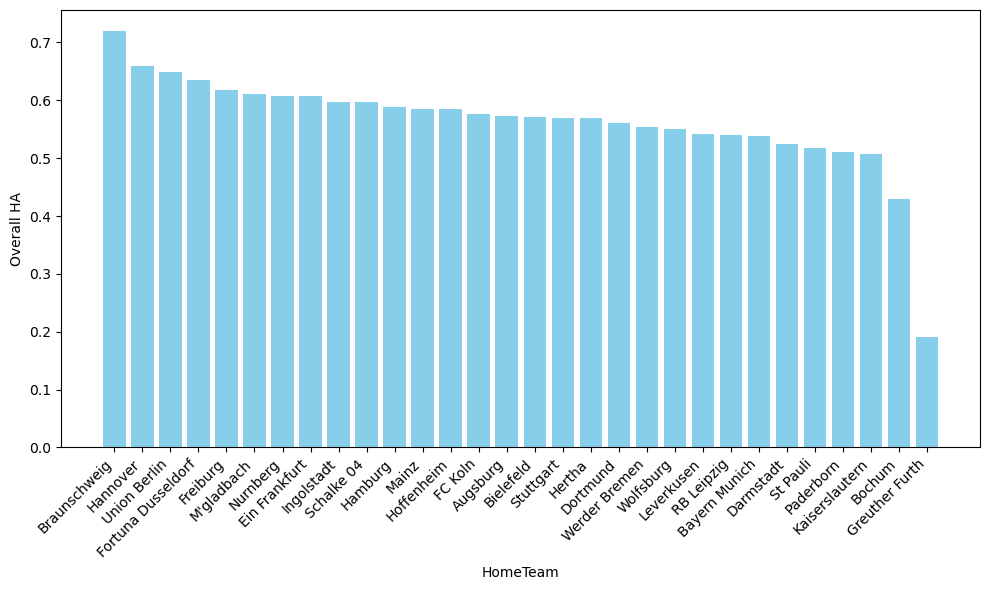

In [25]:
# Sort the data frame by OverallHA column in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['HomeTeam'], total_points['OverallHA'], color='skyblue')
plt.xlabel('HomeTeam')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

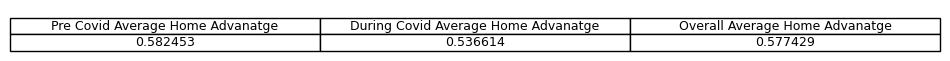

In [26]:
#Pre and during covid average home advantages 

#Calculate the HA for pre covid, during covid and overall, to 6 d.p.
ha_average_pre = round(bundesliga.loc[:3283,'HAPreCovid'].mean(),6)
ha_average_during = round(bundesliga.loc[3283:,'HADuringCovid'].mean(),6)
ha_average = round(bundesliga.loc[:, 'OverallHA'].mean(),6)

#Create a dictoriary to kepp the avergaes in 
ha_means = {
            'Pre Covid Average Home Advanatge':[ha_average_pre],
           'During Covid Average Home Advanatge': [ha_average_during],
           'Overall Average Home Advanatge': [ha_average]}

#Create a data frame from the dictionary
ha_means = pd.DataFrame(ha_means)

#Create a figure and axis for displaying the data
fig = plt.figure(figsize = (12,.1))
ax = fig.add_subplot(111)

#Display the table 
ax.table(cellText = ha_means.values, 
         colLabels = ha_means.columns, cellLoc='center')


#turn axes off
ax.axis('off')
#Show the plot
plt.show()

In [27]:
##Removing Greuther Furth 
bundesliga = bundesliga[bundesliga['HomeTeam']!='Greuther Furth']

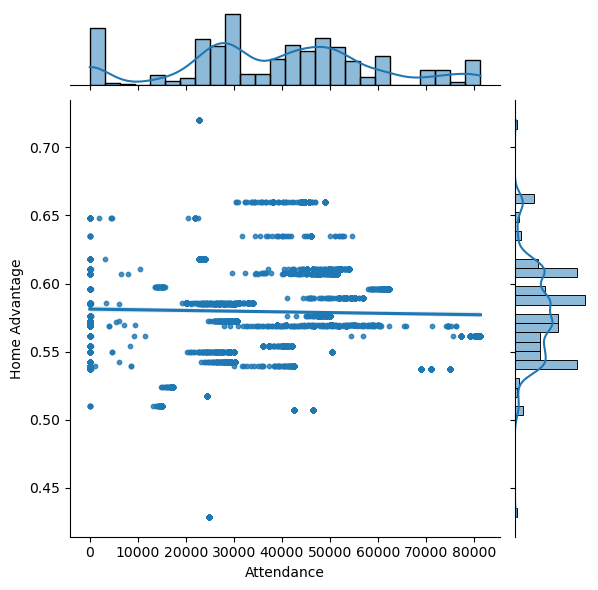

In [28]:
#A join plot using seaborn of attendacne and overallHA
joint_plot = sns.jointplot(x="Attendance", y="OverallHA", data=bundesliga, kind='reg', fit_reg=True,scatter_kws={'s': 10})

# Set individual axis labels
joint_plot.set_axis_labels('Attendance', 'Home Advantage')


# Show the plot
plt.show()

# Cluster Analysis

## Attendance and Pre Covid Home Advantage

In [29]:
#Creating two new data frames from the columns PreCovid
bundesliga_pre_covid = bundesliga[bundesliga['PreCovid'] == True]
bundesliga_during_covid = bundesliga[bundesliga['PreCovid'] == False]


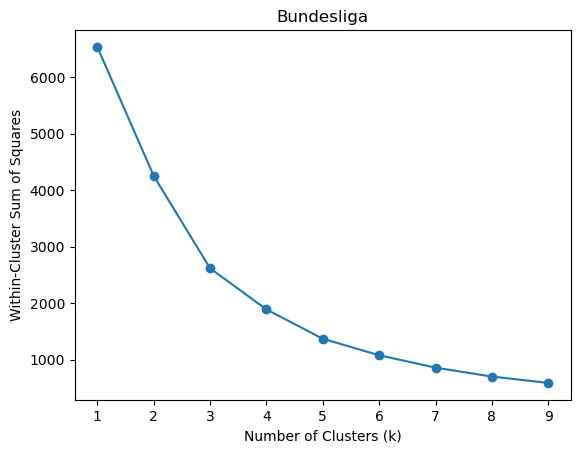

In [30]:
#Extracting the features
select_features = bundesliga_pre_covid[['Attendance','HAPreCovid']]

#Scaling the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)

#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Bundesliga')
plt.show()

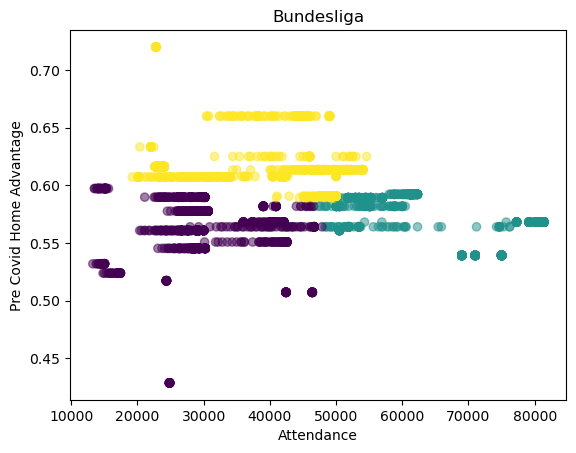

,HAPreCovid,Attendance
Cluster,,
0,0.561711,31127.0
1,0.571436,64754.0
2,0.617667,39787.0


In [33]:
#choosing K
optimal_k = 3

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
bundesliga_pre_covid.loc[:, 'Cluster'] = kmeans.fit_predict(select_features_standardised)




#Plot the clusters
plt.scatter(bundesliga_pre_covid['Attendance'], bundesliga_pre_covid['HAPreCovid'], c=bundesliga_pre_covid['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Pre Covid Home Advantage')
plt.title('Bundesliga')
plt.show()


#cluster summary
cluster_summary = bundesliga_pre_covid.groupby('Cluster')[['HAPreCovid', 'Attendance']].mean()
cluster_sizes = bundesliga_pre_covid['Cluster'].value_counts().sort_index()


# Round Attendance values to 0 decimal places
cluster_summary['Attendance'] = cluster_summary['Attendance'].round(0)



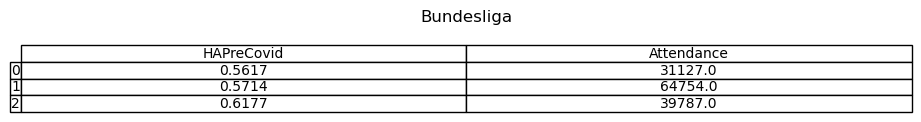

In [34]:
#Displaying the clusters
#Create a figure to show the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Bundesliga')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()

## Match Statistic and Home Advanatge

### Pre Covid

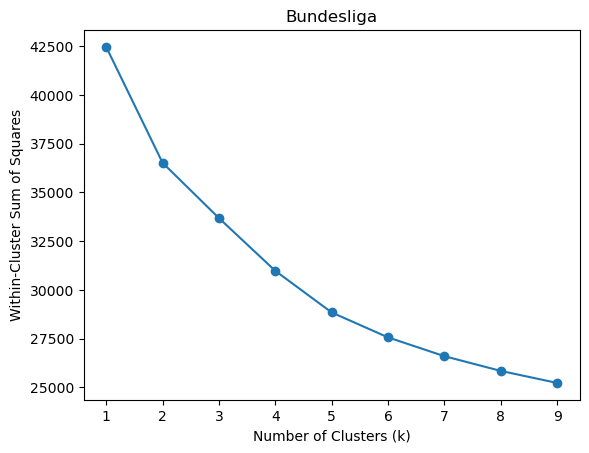

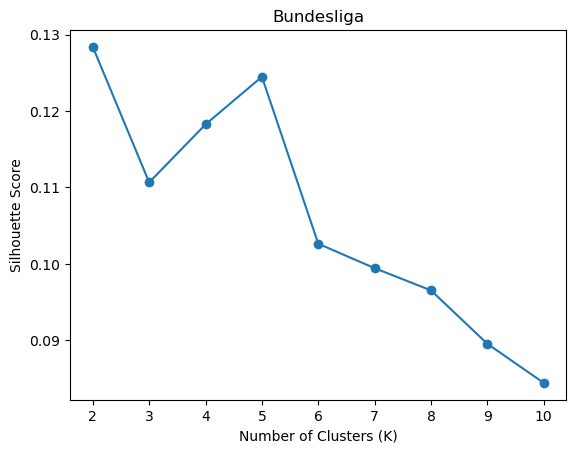

In [35]:
# Select features for clustering
select_features = bundesliga_pre_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR', 'HAPreCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Bundesliga')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Bundesliga')
plt.show()

In [37]:
#optimal value for k
optimal_k = 3
#Apply k-means 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
bundesliga_pre_covid.loc[:, 'Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary = bundesliga_pre_covid.groupby('Cluster')[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HAPreCovid']].mean()

#Create a figure displaying the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Bundesliga')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()

,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HAPreCovid
Cluster,,,,,,,,,,,,,
0,18.902000,8.740000,7.314000,3.022000,7.324000,3.118000,11.699000,13.699000,1.070000,1.763000,0.019000,0.10900,0.571264
1,11.337638,15.806273,3.978782,6.204797,4.113469,6.112546,13.441882,13.345018,1.607011,1.537823,0.095018,0.04059,0.588817
2,12.999154,10.292724,4.432318,3.476311,4.961083,3.719966,17.006768,18.000000,2.107445,2.500846,0.102369,0.12775,0.591693


### During Covid

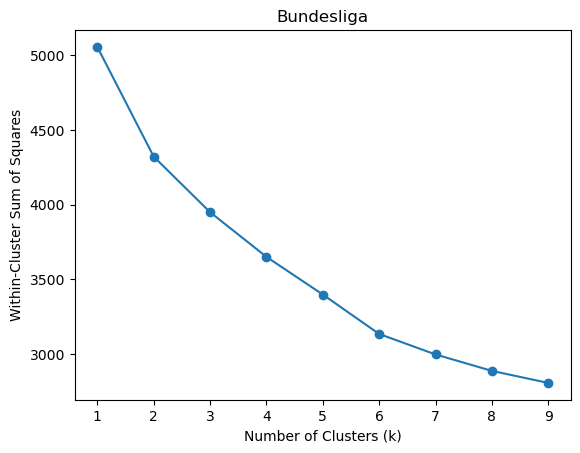

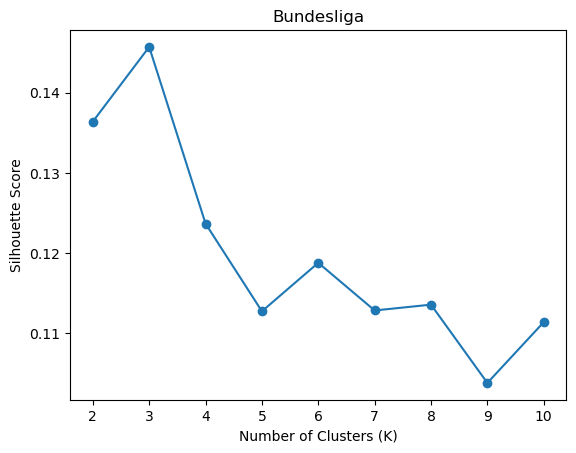

In [43]:

# Select features for clustering
select_features = bundesliga_during_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HADuringCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Bundesliga')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(2, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Bundesliga')
plt.show()

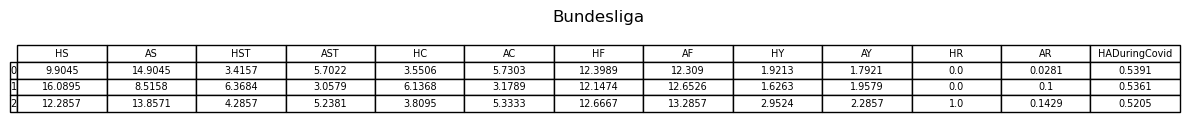

In [45]:
#optimal value for k
optimal_k = 3 
#Apply k-means 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
bundesliga_during_covid.loc[:, 'Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary = bundesliga_during_covid.groupby('Cluster')[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','HADuringCovid']].mean()


#Create a figure displaying the table
fig = plt.figure(figsize = (15, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Bundesliga')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()
